In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import numpy as np
#from itertools import chain
from collections import defaultdict
from numpy import unique
import pandahouse as ph
#from datetime import date
import pandas as pd
import datetime
import time
from scipy import stats
import statsmodels.api as sm


# 1-ОЕ ЗАДАНИЕ

In [2]:
market = pd.read_csv('https://stepik.org/media/attachments/lesson/409319/test1_completed.csv')

In [3]:
market.rename(columns={'Товар' : 'product_name', 'Количество' : 'count_of_product'}, inplace=True)

## План работы:
1) Сначала перебрать всевозможные пары продуктов для одного пользователя (id)  
2) Применить это действие для всех пользователя (id)  
3) Объединить эти пары в один датафрейм  
4) Создать функцию, которая считает сколько раз встречается конкретная пара продуктов  
5) Найти 5 наиболе встречающихся пар  


In [4]:
def func_id_little(id):
    list1 = market[market.id == id].product_name.tolist()
    return list1

Образуем теперь уникальные пары для каждого уникального id покупателя.

In [5]:
list_finish_1 = [list(itertools.combinations(x, 2)) for x in [func_id_little(x) for x in market.id.unique()]]
list_finish_1[0]

[('Лимон', 'Лимон оранжевый'),
 ('Лимон', 'Лук-порей'),
 ('Лимон', 'Лук репчатый'),
 ('Лимон', 'Малина свежая'),
 ('Лимон', 'Морковь немытая'),
 ('Лимон', 'Черешня сушеная'),
 ('Лимон оранжевый', 'Лук-порей'),
 ('Лимон оранжевый', 'Лук репчатый'),
 ('Лимон оранжевый', 'Малина свежая'),
 ('Лимон оранжевый', 'Морковь немытая'),
 ('Лимон оранжевый', 'Черешня сушеная'),
 ('Лук-порей', 'Лук репчатый'),
 ('Лук-порей', 'Малина свежая'),
 ('Лук-порей', 'Морковь немытая'),
 ('Лук-порей', 'Черешня сушеная'),
 ('Лук репчатый', 'Малина свежая'),
 ('Лук репчатый', 'Морковь немытая'),
 ('Лук репчатый', 'Черешня сушеная'),
 ('Малина свежая', 'Морковь немытая'),
 ('Малина свежая', 'Черешня сушеная'),
 ('Морковь немытая', 'Черешня сушеная')]

In [6]:
def table_maker(list_tuple):
    '''Разделить каждый кортеж на 2 части и получить два списка.
       Входные данные : список с кортежом tuple.
       Выходные данные : кортеж со списком первого элемента и со списком второго элемента пары.
    '''
    list_1 = [x[0] for x in list_tuple]
    list_2 = [x[1] for x in list_tuple]
    return list_1, list_2

In [7]:
def final_table_maker():
    '''Получить таблицу из двух столбцов.'''
    list_3 = []
    list_4 = []
    for my_tuple in list_finish_1:
        list_3.extend(table_maker(my_tuple)[0])
        list_4.extend(table_maker(my_tuple)[1])
    table_df = pd.DataFrame({'product_1': list_3, 'product_2': list_4})
    return table_df

In [12]:
united_table = final_table_maker()
united_table.head()

,product_1,product_2
0,Лимон,Лимон оранжевый
1,Лимон,Лук-порей
2,Лимон,Лук репчатый
3,Лимон,Малина свежая
4,Лимон,Морковь немытая


In [10]:
dictionary = defaultdict(int)  
for row in united_table.itertuples(name='ride', index=False):
    #  убираем разницу в [a, b] и [b, a]
    myList = sorted(list(row)) 
    #  переводиv словарь в строку, где покупки отделяются запятой
    myString = ','.join(map(str, myList)) 
    #  считаеv кличество покупок
    dictionary[myString] += 1  

In [11]:
list_product_1 = [] 
list_product_2 = []
list_count = []
for key in dictionary:
        dictionary_List = key.split(',')
        #  создаем список из первых и вторых покупок
        list_product_1.append(dictionary_List[0])  
        list_product_2.append(dictionary_List[1]) 
        list_count.append(dictionary.get(key))  
final_table = pd.DataFrame({'product_1': list_product_1, 
                          'product_2': list_product_2, 
                          'count': list_count})
final_table.sort_values('count', ascending=False).head()

,product_1,product_2,count
291,Огурцы Луховицкие,Укроп,431
297,Петрушка,Укроп,408
3630,Арбуз,Огурцы Луховицкие,345
855,Кабачки,Огурцы Луховицкие,326
443,Кинза,Укроп,303


# 2-ОЕ ЗАДАНИЕ

In [19]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/426638/test2_completed.csv")
df.head()

,Дата,Число заказов
0,2020-01-05,650
1,2020-01-12,837
2,2020-01-19,1020
3,2020-01-26,1176
4,2020-02-02,1489


In [20]:
df.shape

(14, 2)

In [21]:
df.dtypes

Дата             object
Число заказов     int64
dtype: object

Так как у нас небольшое количество данных, целесообразно воспользоваться простой моделью предсказания.  
Для этого воспользуемся регрессионной моделью, а именно методом наименьших квадратов.  
Сначала сделаем определенные преобразования.

In [22]:
df = df.rename(columns = {'Дата': 'date', 'Число заказов' : 'orders_count'})
df['date'] = pd.to_datetime(df['date'])
df['second'] = df[['date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
df.head(3)

,date,orders_count,second
0,2020-01-05,650,1578182400
1,2020-01-12,837,1578787200
2,2020-01-19,1020,1579392000


Пусть независимой переменной будут недели (секунды), а зависимой - число заказов. Посмотрим на корреляцию между переменными.

Text(0, 0.5, 'Число заказов\n')

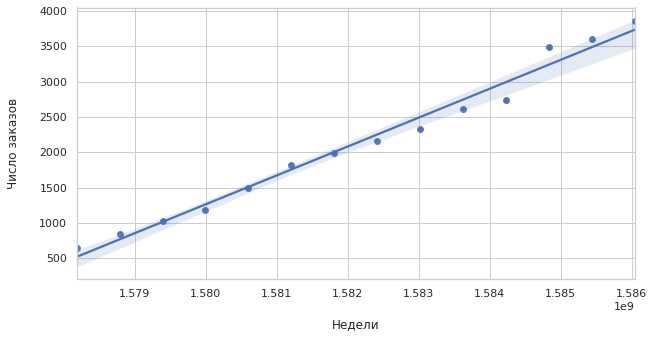

In [17]:
sns.set(style='whitegrid', rc={'figure.figsize' : (10,5)}) 
sns.scatterplot(x = 'second', y = 'orders_count', data = df)
sns.regplot(x = 'second', y = 'orders_count', data = df)
plt.xlabel('\nНедели')
plt.ylabel('Число заказов\n')

Разделим набор данных на обучающий и тестовый наборы. Обучающим набором будут имеющиеся у нас данные.

In [18]:
independent_value_X = df.second.values.reshape(-1,1)
dependent_value_Y = df['orders_count'].values.reshape(-1,1)

Обучение нашей простой модели линейной регрессии на обучающем наборе.

In [19]:
regression_model = LinearRegression().fit(independent_value_X, dependent_value_Y)
print(regression_model.intercept_ , regression_model.coef_, regression_model.score(independent_value_X, dependent_value_Y))

[-645381.00973312] [[0.00040927]] 0.9825538022955228


Тестовый набор - недели, которые мы хотим предсказать. В нашем случае это 3 месяца начиная с 2020-04-12.

In [20]:
predict_date = pd.Series(['2020-04-12','2020-04-19','2020-04-26','2020-05-03','2020-05-10','2020-05-17',
                          '2020-05-24','2020-05-31','2020-06-07','2020-06-14','2020-06-21','2020-06-28',
                         ])
week = predict_date

In [21]:
predict_date = [int(time.mktime(datetime.datetime.strptime(i , '%Y-%m-%d').timetuple())) for i in predict_date]
predict_date = np.array(predict_date).reshape(12,1)

Прогнозирование результатов тестового набора

In [22]:
X_predict = predict_date 
y_predict = regression_model.predict(X_predict)

In [23]:
df_prediction = pd.DataFrame(data=np.array(y_predict), columns=["orders_count"])
df_prediction["date"] = week
df_prediction.orders_count = df_prediction.orders_count.apply(round)
df_prediction

,orders_count,date
0,3981,2020-04-12
1,4228,2020-04-19
2,4476,2020-04-26
3,4723,2020-05-03
4,4971,2020-05-10
5,5219,2020-05-17
6,5466,2020-05-24
7,5714,2020-05-31
8,5961,2020-06-07
9,6209,2020-06-14


# 3-ЬЕ ЗАДАНИЕ

In [13]:
table_3 = pd.read_csv('/home/jupyter-l.mehtieva-11/final_project/my_task_3.csv')

In [15]:
table_3.head(15)

,purchase_id,client_id,purchase_date,quantity,revenue,client_category,client_age,client_registration_age,promotion_name,category_name,partner_name,client_city,city
0,3,124,10/10/20,3,930,new,30,935,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Минск,Новгород
1,7,641,06/04/20,3,435,new,28,691,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Щучинщина,Киев
2,11,896,24/03/20,7,2310,new,28,841,campaign_3,Овощи,Всем партнёрам партнёр,Вена,Казань
3,12,99,22/09/20,8,2320,new,28,560,campaign_3,Овощи,Всем партнёрам партнёр,Вена,Казань
4,14,52,30/09/20,7,3325,new,30,999,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Вена,Москва
5,21,349,25/10/20,5,2425,new,25,848,campaign_4,Прочее,KarpovCourses,Санкт-Петербург,Щучинщина
6,23,275,10/10/20,6,660,new,30,513,campaign_2,Фрукты,"ООО Ширяева, Хохлова и Тимофеева",Вена,Казань
7,26,10,18/05/20,2,570,new,21,693,campaign_4,Прочее,KarpovCourses,Ярославль,Санкт-Петербург
8,34,747,30/03/20,2,980,new,25,554,campaign_1,Бакалея,Google,Санкт-Петербург,Минск
9,35,379,24/08/20,5,1900,new,28,884,campaign_1,Бакалея,Google,Санкт-Петербург,Минск


Оставляю код для проверки. Работала в REDASH

'''

SELECT     a.purchase_id AS purchase_id,  
           a.client_id AS client_id,  
           a.purchase_date AS purchase_date,   
           CAST(a.quantity AS Int64) AS quantity,  
           CAST(a.revenue AS Int64) AS revenue,  
           a.client_category AS client_category,  
           CAST(b.client_age AS Int64) AS client_age,  
           CAST(b.client_registration AS Int64) client_registration_age, /* в днях */  
           c.promotion_name AS promotion_name,  
           c.category_name AS category_name,  
           c.partner_name AS partner_name,  
           d.client_city AS client_city,  
           d.city AS city  
    FROM  (            
                SELECT l.purchase_id AS purchase_id,  
                       l.client_id AS client_id,  
                       l.city_id AS city_id,  
                       l.purchase_date AS purchase_date,   
                       l.category_id AS category_id,  
                       l.quantity AS quantity,  
                       l.revenue AS revenue,  
                       r.client_category AS client_category  
                       
                FROM   (      
                
                        SELECT purchase_id,  
                               client_id,  
                               city_id,  
                               promotion_id,  
                               purchase_date, 
                               category_id,
                               quantity,
                               price*quantity AS revenue
                        FROM project_variant_2.purchase
                        WHERE    (purchase_date >= '01.05.2020'
                                   OR
                                  purchase_date <= '01.08.2020')
                                   AND
                                 (status == 1)
                                   AND 
                                ((promotion_id == partner_id) and (category_id == partner_id))
                        ) AS l
        RIGHT outer JOIN    (
            SELECT client_id,
                   purchase_id,
                   CASE WHEN count_purch == 1
                     THEN 'new'
                     ELSE  'old' 
                   END as client_category
            FROM 
                    (
                    SELECT client_id,
                    purchase_id,
                    COUNT(purchase_id) OVER (PARTITION BY client_id ORDER BY purchase_id) AS count_purch
                    FROM project_variant_2.purchase
                    WHERE (purchase_date >= '01.05.2020'
                                    OR
                           purchase_date <= '01.08.2020')
                                    AND
                            (status == 1))
                        ) AS r
                ON l.purchase_id = r.purchase_id
                ) AS a
JOIN    (  
        SELECT *,  
           CASE WHEN formatDateTime(now(), '%m-%d') < formatDateTime(birth_date, '%m-%d')  
                THEN (YEAR(now()) - YEAR(birth_date)) - 1  
                ELSE  YEAR(now()) - YEAR(birth_date)  
           END as client_age,  
           
           DateDiff(Day,registration,now()) as client_registration /* будем считать, что клиент начал пользоваться магазином,   когда зарегестрировался */  
           
        FROM project_variant_2.client  
        ) AS b  
    ON a.client_id = b.client_id  
JOIN project_variant_2.promotion AS c  
    ON a.category_id = c.category_id  
LEFT SEMI JOIN project_variant_2.city AS d  
    ON a.city_id = d.city_id  

'''